In [31]:
# import necessary libraries for a computer vision problem
import torch
from torch import nn 

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [32]:
# lets get a dataset to work on an example computer vision problem
# we can use MNIST dataset which contains thousands of handwritten digits
# but instead, lets work on FashionMNIST dataset, so lets download it

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # get the training data
    download=True,
    transform=ToTensor() #images are in PIL format, it transforms them to pytorch tensors
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [33]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [34]:
image.shape
# [color channel, height, width]



torch.Size([1, 28, 28])

In [35]:
# lets see how many samples we have
print(f"len(train_data.data) : {len(train_data.data)}")
print(f"len(test_data.data): {len(test_data.data)}")
print()
# what are the classes?
class_names = train_data.classes
print(class_names)

len(train_data.data) : 60000
len(test_data.data): 10000

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(-0.5, 27.5, 27.5, -0.5)

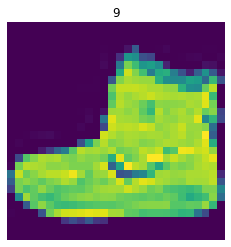

In [36]:
# lets visualize one of these datas
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)
plt.axis('off')

Text(0.5, 1.0, 'Ankle boot')

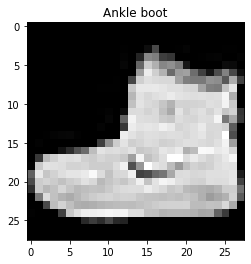

In [37]:
plt.imshow(image.squeeze(dim=0), cmap="gray")
plt.title(class_names[label])

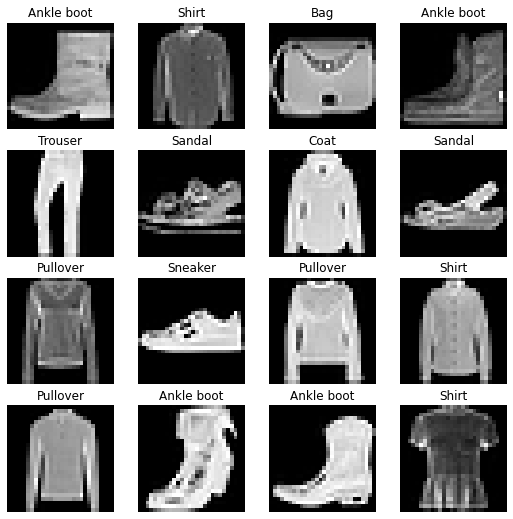

In [38]:
# let's see a few more images from this dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows * cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")
    
    


In [39]:
# Now that we have a dataset, we need to create a dataloader
# it turns a large dataset into a sequence of smaller chunkes(batches) of images and labels

from torch.utils.data import DataLoader
BATCH_SIZE = 32 # how many samples per batch to load | Hyperparameter
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [40]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
label: 6, label size: torch.Size([])


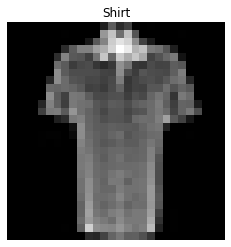

In [41]:
# lets see a sample

torch.manual_seed(42)
random_idx =  torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image Size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

In [42]:

# we should start with a flatten model to change the data into simple vectors
flatten_model = nn.Flatten()

# get a single batch of data
x = train_features_batch[0]

# flatten the data
output = flatten_model(x) # 784 = 28 * 28

# lets see the shape of the data
print(f"Shape of data before flatten: {x.shape}")
print(f"Shape of data after flatten: {output.shape}")



Shape of data before flatten: torch.Size([1, 28, 28])
Shape of data after flatten: torch.Size([1, 784])


In [43]:
# lets build a baseline model now with only 2 linear layers
from torch import nn
class FashionMNISTModelV0(nn.Module):
    
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        logits = self.layer_stack(x)
        return logits



In [44]:
# now let's create an instance of this model
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, 
                              hidden_units=8, 
                              output_shape=10)

model_0.to("cpu")


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [45]:
# before we train the model, we need to define a loss function and an optimizer


In [46]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [30]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)